In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random
import imageio
import scipy.misc as msq
from PIL import Image
%matplotlib inline

In [79]:
sizes = np.array([512,512])
pct_noise_train = 0.25
pct_noise_val = 0.025

for ii in range (0,100):
    array_train = np.random.choice([0, 1], size=(sizes[0]*sizes[1],), p=[pct_noise_train, 1.-pct_noise_train])
    indeces = np.nonzero(array_train)
    zeros_validation= random.sample(set(indeces[0]), int(sizes[0]*sizes[1]*pct_noise_val))
    array_val = np.ones(shape=(sizes[0]*sizes[1],))
    array_val[zeros_validation] = [0]

    array_train = array_train.reshape(sizes[0],sizes[1])
    array_val = array_val.reshape(sizes[0],sizes[1])
    np.save('./masks/train'+str(ii)+'.npy',array_train)
    np.save('./masks/val'+str(ii)+'.npy',array_val)


In [37]:
a = np.load('1_val_mask.npy')

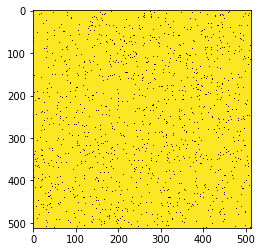

In [38]:
plt.figure()
plt.imshow(a)


In [34]:
image= imageio.imread('./1_ref.bmp')

In [35]:
applied = np.multiply(a,image)
im = Image.fromarray(applied.astype(np.uint8))
im.save('1_noisy.bmp')

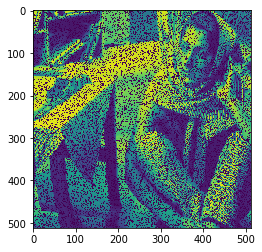

In [36]:
plt.figure()
plt.imshow(applied)

132